In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns
#ahmed

In [53]:
key_stats = pd.read_csv('key_stats.csv')
attacking = pd.read_csv('attacking.csv')
defending = pd.read_csv('defending.csv')
attempts = pd.read_csv('attempts.csv')
disciplinary = pd.read_csv('disciplinary.csv')
distributon = pd.read_csv('distributon.csv')
goalkeeping = pd.read_csv('goalkeeping.csv')
goals = pd.read_csv('goals.csv')

In [54]:
# feature engineering

attempts['attempts_accuracy'] = 100 * attempts['on_target'] / attempts['total_attempts']
defending['tackles_accuracy'] = 100* defending['t_won'] / defending['tackles']
defending['balls_recoverd_per_match'] = defending['balls_recoverd'] / defending['match_played']
goals['goals_per_match'] = goals['goals'] / goals['match_played']
goalkeeping['gk_accuracy'] = 100 * goalkeeping['saved'] / (goalkeeping['saved']+goalkeeping['conceded'])
goalkeeping['cleansheets_rate'] = 100 * goalkeeping['cleansheets'] / goalkeeping['match_played']

In [55]:
# merged dataframe

dataframes = [key_stats, attacking, defending, attempts, disciplinary, distributon, goalkeeping, 
              goals]

df = dataframes[0]

for data in dataframes[1:]:
    df = pd.merge(df, data, on='player_name', how='outer', suffixes=('', '_duplicate'))

df = df.loc[:, ~df.columns.str.endswith('_duplicate')]
df = df.loc[:, ~df.columns.str.contains('serial')]
df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,corner_taken,offsides,...,gk_accuracy,cleansheets_rate,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,goals_per_match
0,Aaronson,Salzburg,Midfielder,715.0,8.0,0.0,2.0,103.5,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abubakari,Malmö,Forward,116.0,4.0,0.0,0.0,15.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acuña,Sevilla,Defender,379.0,5.0,0.0,0.0,43.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Adams,Leipzig,Midfielder,292.0,5.0,0.0,0.0,38.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adamu,Salzburg,Forward,231.0,8.0,1.0,0.0,32.6,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.125


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_name               1003 non-null   object 
 1   club                      1002 non-null   object 
 2   position                  1002 non-null   object 
 3   minutes_played            1002 non-null   float64
 4   match_played              1002 non-null   float64
 5   goals                     1002 non-null   float64
 6   assists                   1002 non-null   float64
 7   distance_covered          1002 non-null   object 
 8   corner_taken              328 non-null    float64
 9   offsides                  328 non-null    float64
 10  dribbles                  328 non-null    float64
 11  balls_recoverd            888 non-null    float64
 12  tackles                   888 non-null    float64
 13  t_won                     888 non-null    float64
 14  t_lost  

In [57]:
df.describe()

,minutes_played,match_played,goals,assists,corner_taken,offsides,dribbles,balls_recoverd,tackles,t_won,...,gk_accuracy,cleansheets_rate,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,goals_per_match
count,1002.000000,1002.000000,1002.000000,1002.000000,328.000000,328.000000,328.000000,888.000000,888.000000,888.000000,...,134.000000,134.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,342.150699,5.194611,0.428144,0.363273,2.158537,0.762195,6.341463,18.012387,5.304054,2.194820,...,83.598326,63.940115,0.924765,0.514107,0.188088,0.012539,1.297806,0.344828,0.112853,0.246109
std,239.140607,2.644628,1.166176,0.821641,5.028286,1.789753,8.747521,15.332058,4.817282,2.444259,...,19.613152,43.092786,1.127409,0.944508,0.491163,0.111449,1.641357,0.532199,0.426840,0.196787
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,42.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923
25%,139.750000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,1.000000,0.000000,...,66.666667,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000
50%,326.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000,13.000000,4.000000,1.000000,...,100.000000,100.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.166667
75%,499.750000,7.000000,0.000000,0.000000,1.000000,1.000000,7.000000,24.000000,9.000000,3.000000,...,100.000000,100.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.333333
max,1230.000000,13.000000,15.000000,7.000000,36.000000,10.000000,83.000000,76.000000,35.000000,18.000000,...,100.000000,100.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000,1.375000


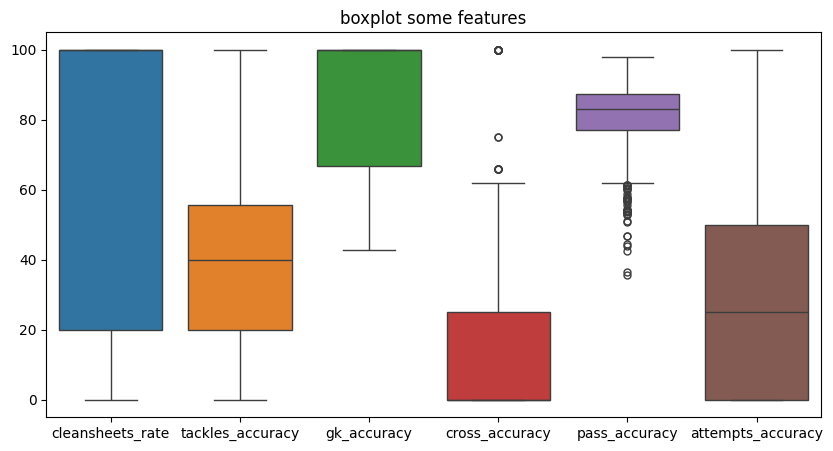

In [58]:
plt.figure(figsize=((10,5)))
plt.title('boxplot some features')
soccer_box=sns.boxplot(data=df[['cleansheets_rate', 'tackles_accuracy','gk_accuracy', 'cross_accuracy', 'pass_accuracy', 'attempts_accuracy']],fliersize=5)   # fliersize is the size used to indicate the outliers
plt.show()

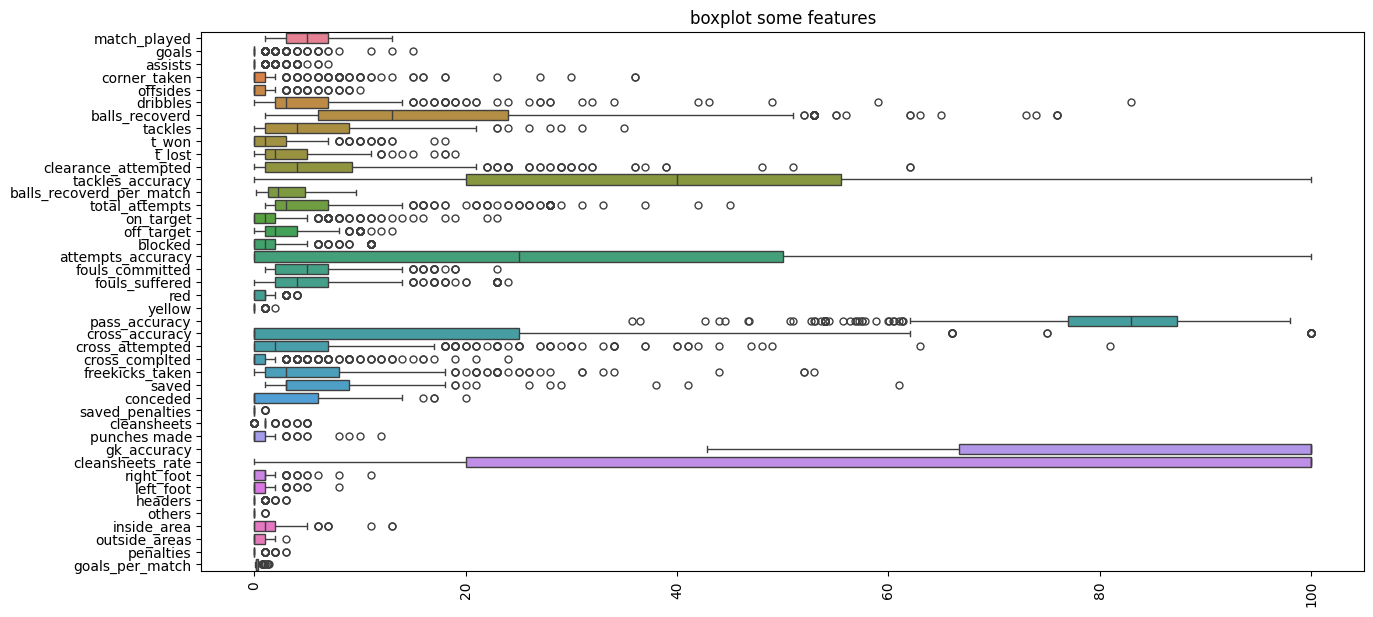

In [59]:
plt.figure(figsize=((15,7)))
plt.title('boxplot some features')
data = df.drop(columns=['minutes_played', 'pass_attempted', 'pass_completed'])
food_box=sns.boxplot(data=data,fliersize=5, orient='h')
plt.xticks(rotation=90)
plt.show()

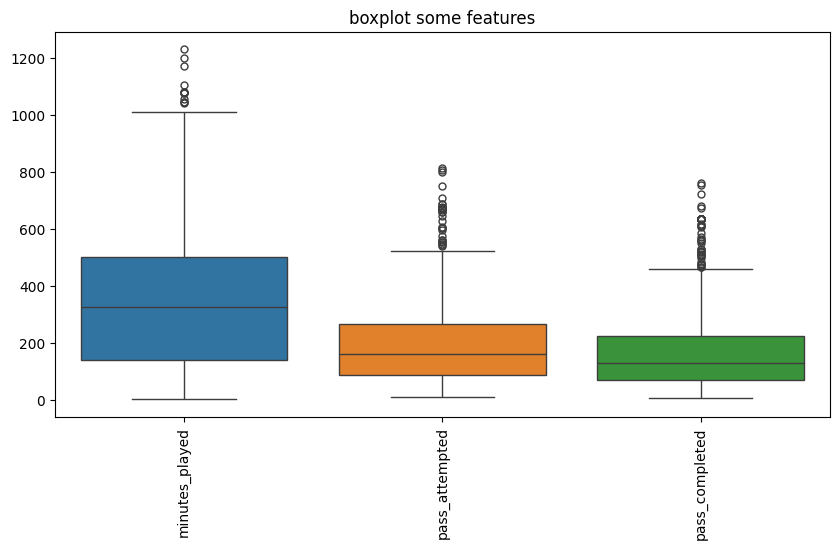

In [60]:
plt.figure(figsize=((10,5)))
plt.title('boxplot some features')
data = df[['minutes_played', 'pass_attempted', 'pass_completed']]
food_box=sns.boxplot(data=data,fliersize=5)
plt.xticks(rotation=90)
plt.show()

# Factorial analysis

In [61]:
def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap)

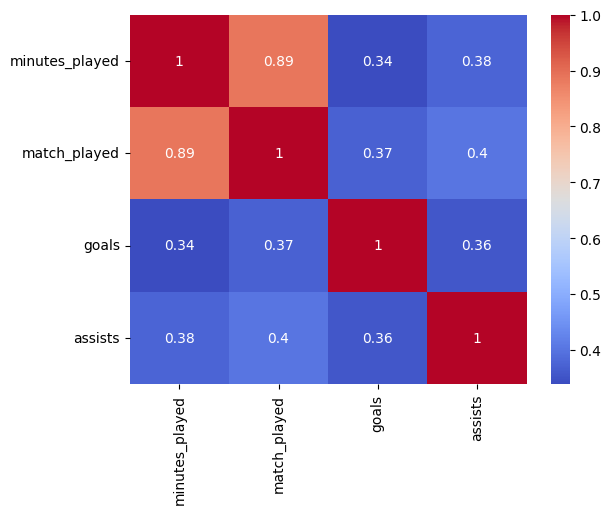

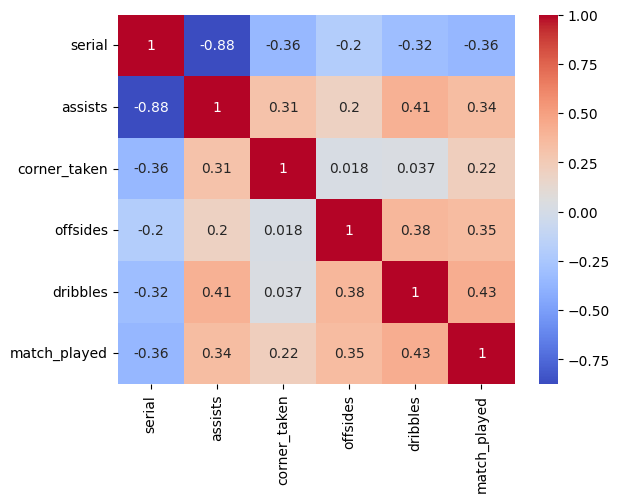

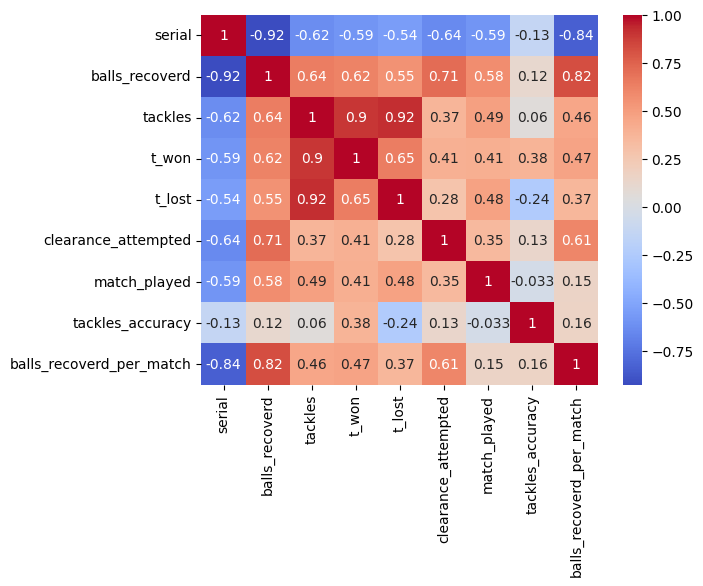

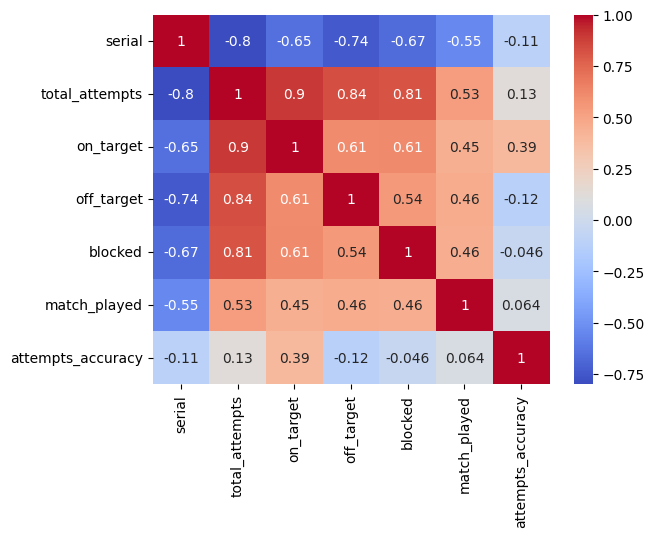

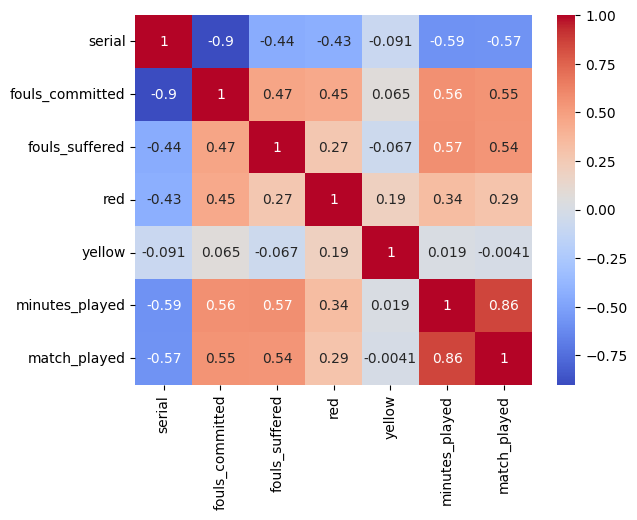

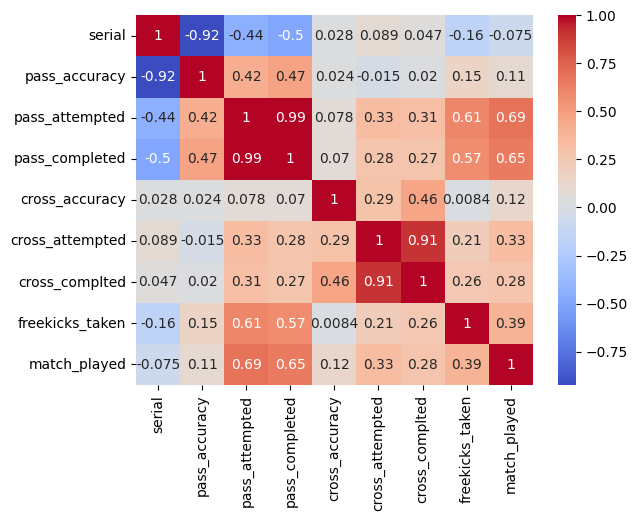

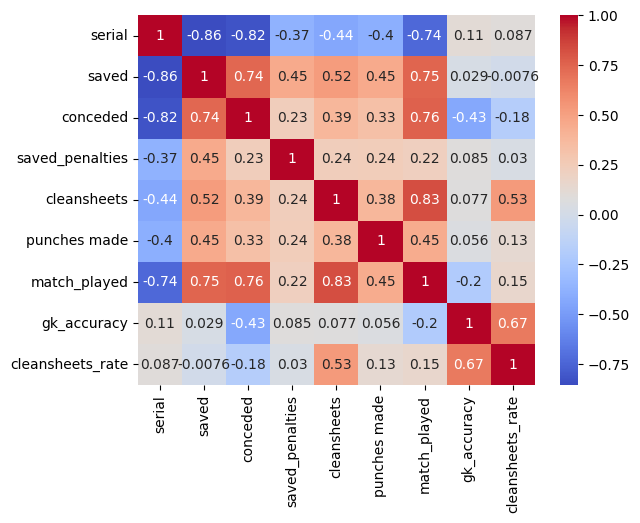

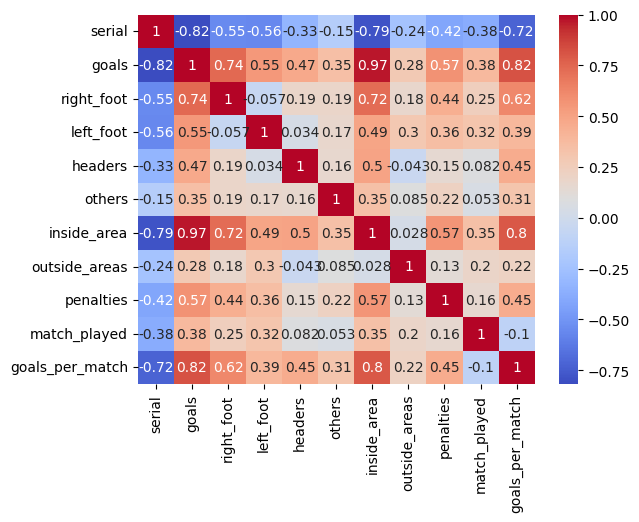

In [62]:
for data in dataframes:
    corr = data.select_dtypes(exclude='object').corr()
    if corr.shape[0] > 1 and not corr.isnull().all().all():
        plt.figure()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.show()
    else:
        print("La matrice de corrélation est vide ou n'a qu'une seule colonne.")

<Axes: xlabel='pass_attempted', ylabel='pass_completed'>

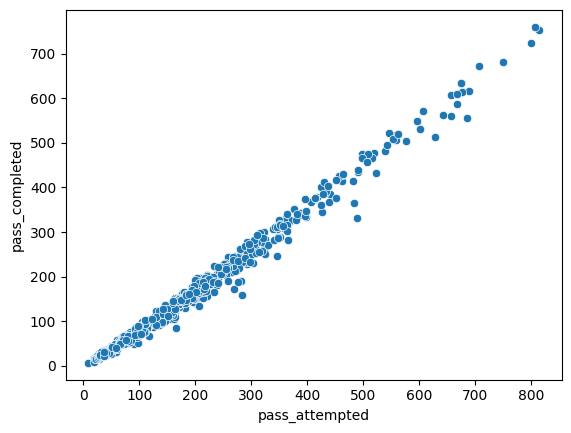

In [63]:
sns.scatterplot(df, x='pass_attempted', y='pass_completed')

<Axes: >

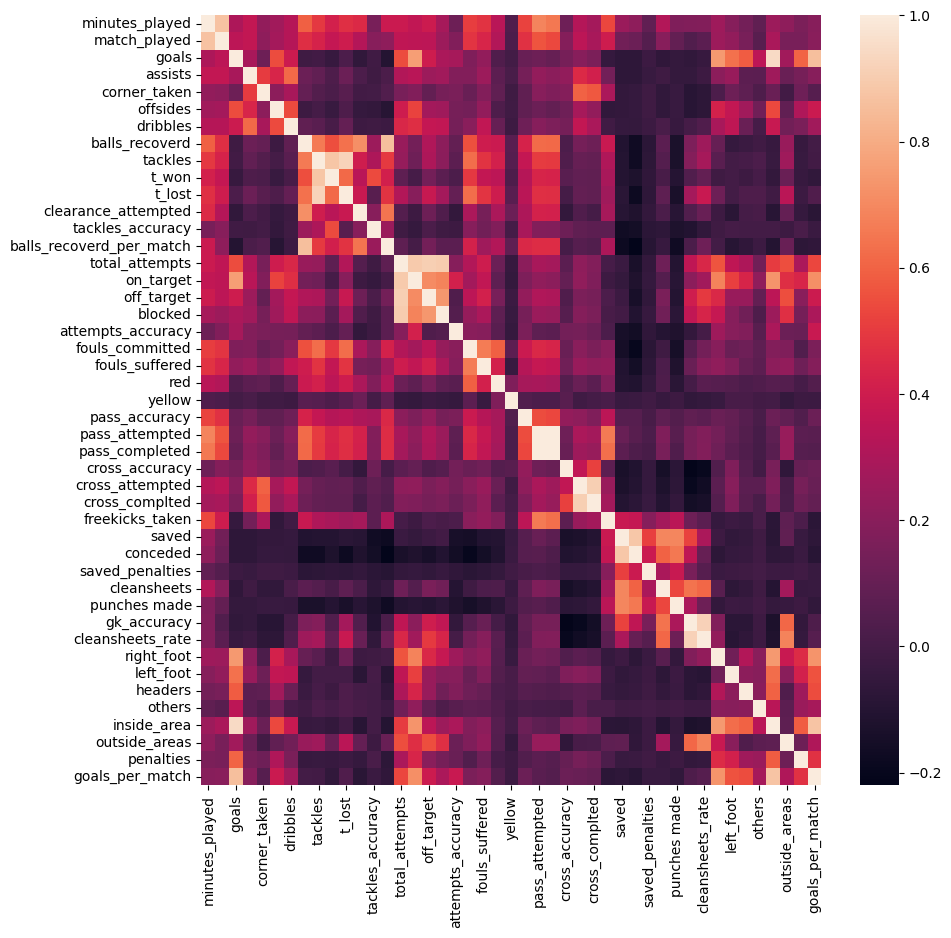

In [64]:
corr = df.select_dtypes(exclude='object').fillna(value=0).corr()
plt.figure(figsize=((10,10)))
sns.heatmap(corr)

# PCA

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.metrics import mean_squared_error

In [66]:
X = df.select_dtypes(exclude='object').fillna(value=0).values
std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [67]:
pca = PCA().fit(X_scaled)

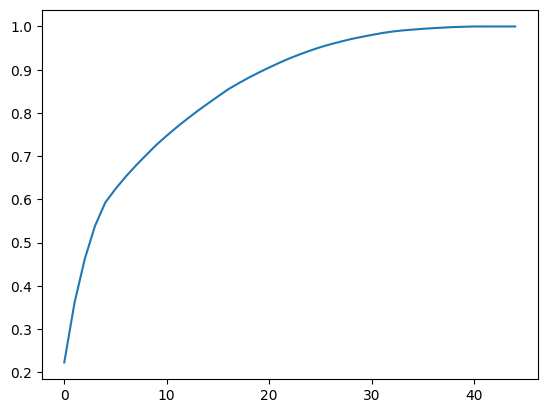

In [68]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Pas de coude apparant ce qui le rend le choix de dimension complique : on peut cependant voir qu'en choisissant 20 dimensions (divier par plus de 2 le nombre de dimension initial), on arrive a retrouver 90% de l'information. Tentons d'autres approches

Dimension la plus corrélée: 0
Corrélation: 0.7652


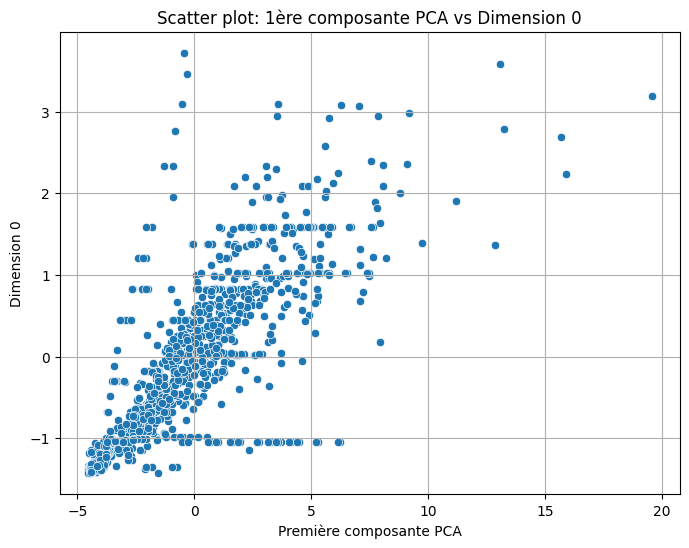

In [69]:
pca = PCA(n_components=X.shape[1])  
X_pca = pca.fit_transform(X_scaled)
first_pca_component = X_pca[:, 0]
correlations = []
for i in range(X_scaled.shape[1]):
    corr = np.corrcoef(first_pca_component, X_scaled[:, i])[0, 1]
    correlations.append(corr)

best_index = np.argmax(np.abs(correlations))
best_corr = correlations[best_index]

print(f"Dimension la plus corrélée: {best_index}")
print(f"Corrélation: {best_corr:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=first_pca_component, y=X_scaled[:, best_index])
plt.title(f"Scatter plot: 1ère composante PCA vs Dimension {best_index}")
plt.xlabel('Première composante PCA')
plt.ylabel(f'Dimension {best_index}')
plt.grid(True)
plt.show()

In [70]:
X_proj = pca.transform(X_scaled)

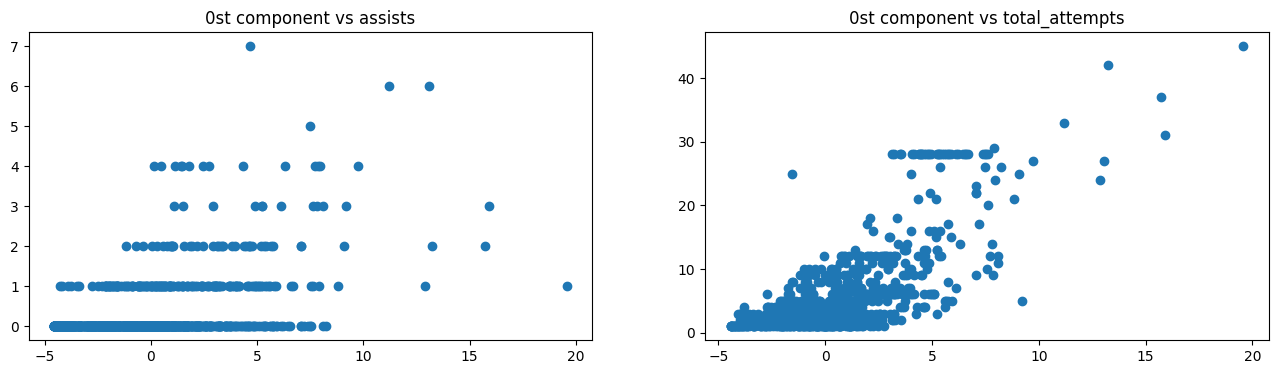

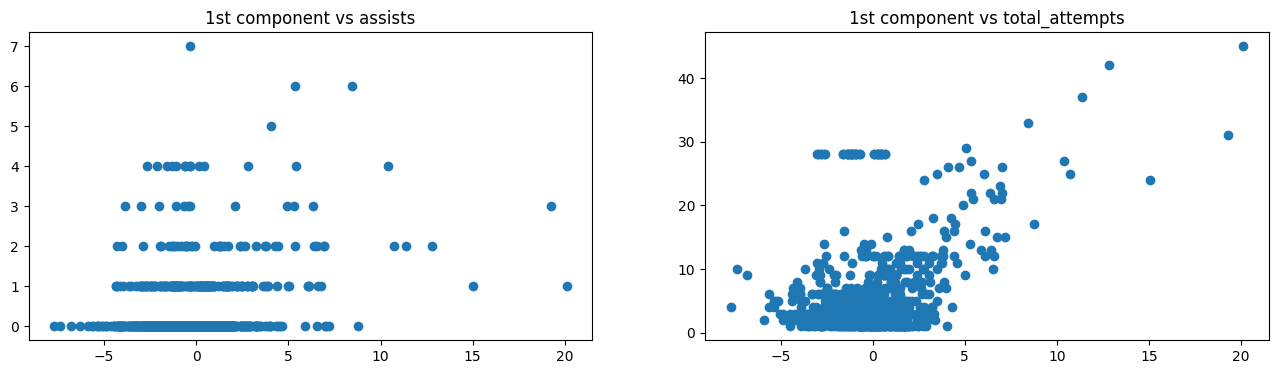

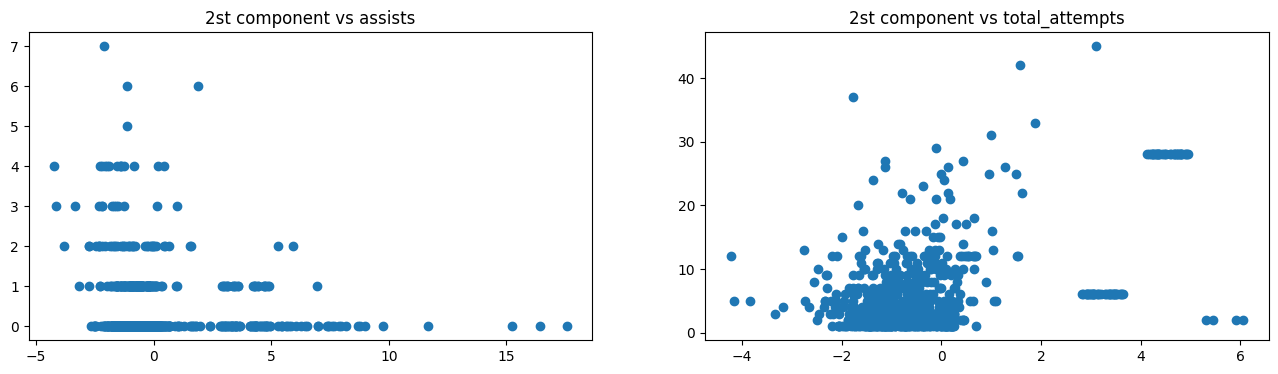

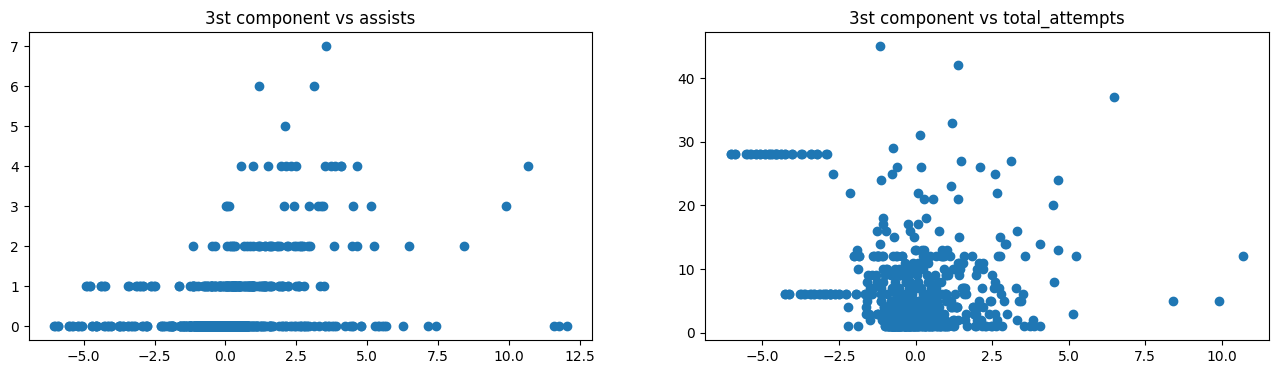

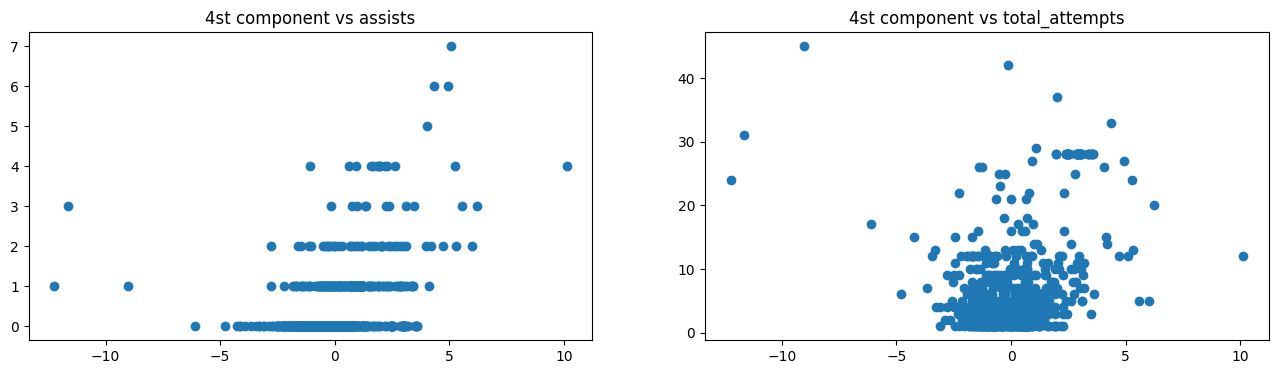

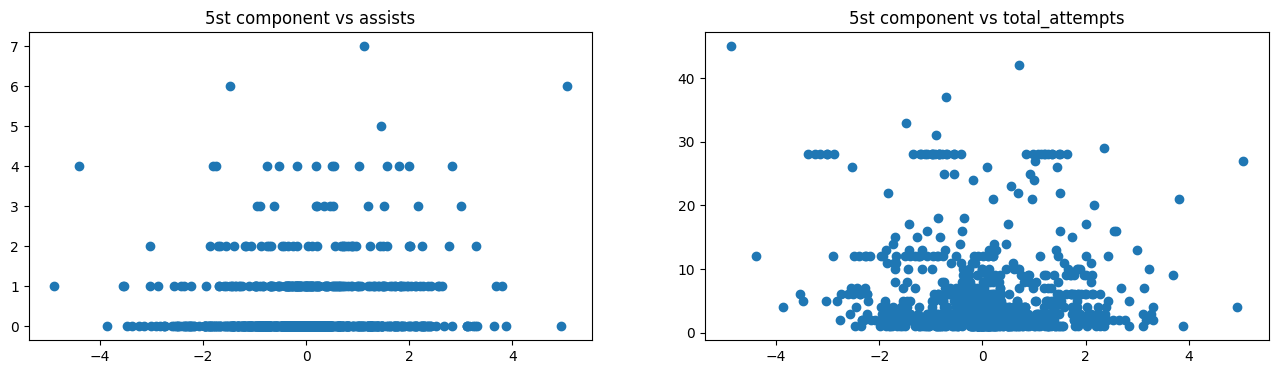

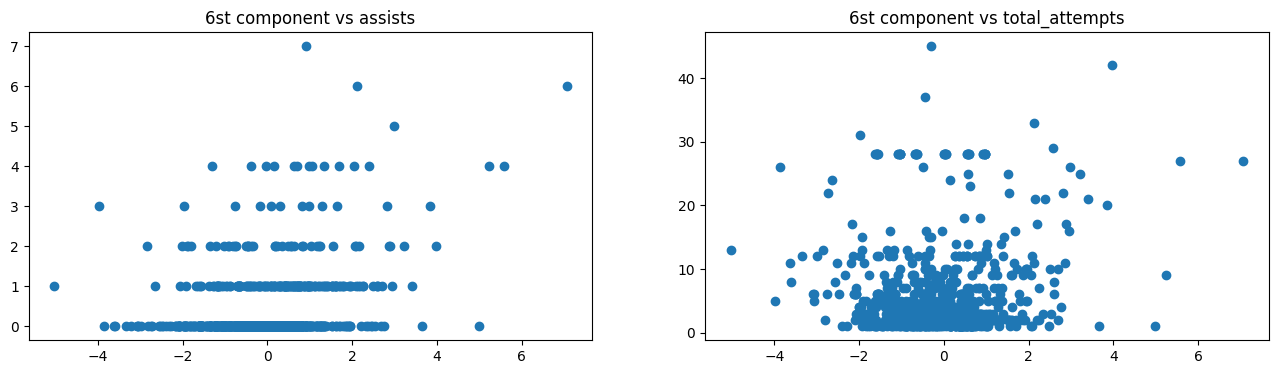

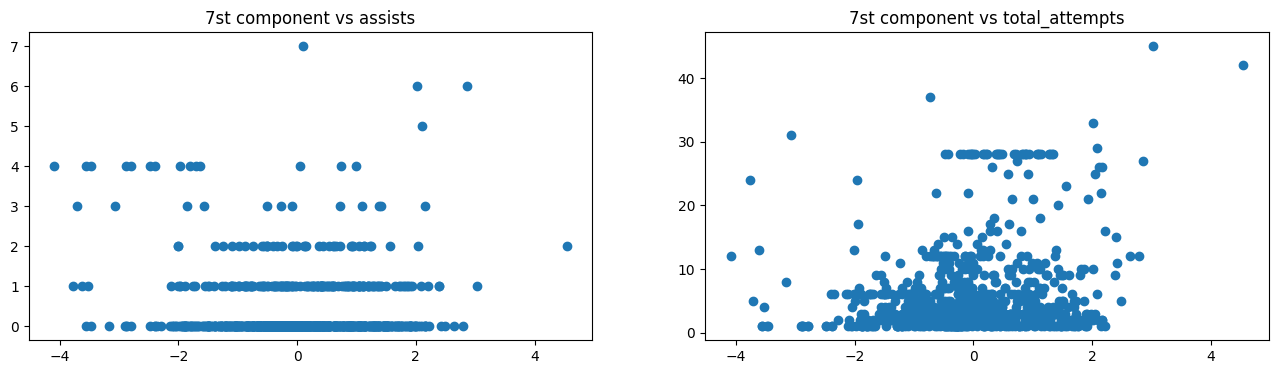

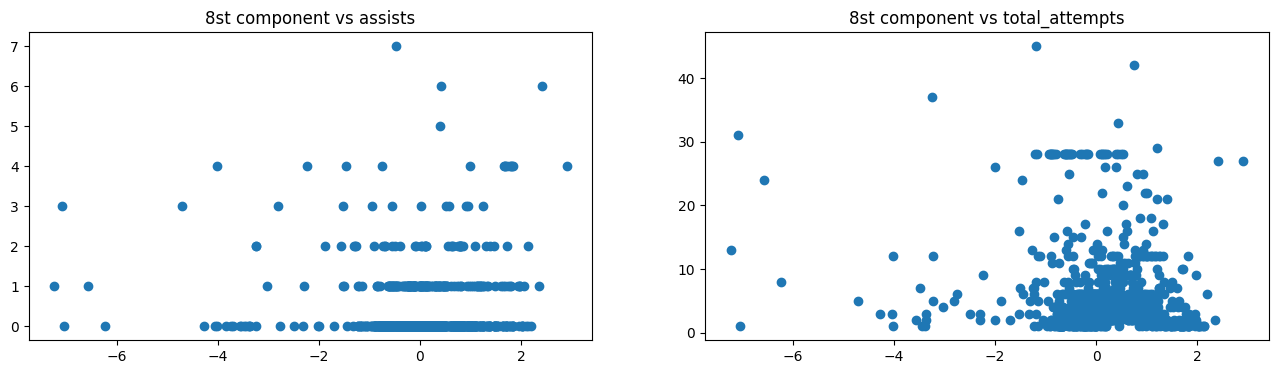

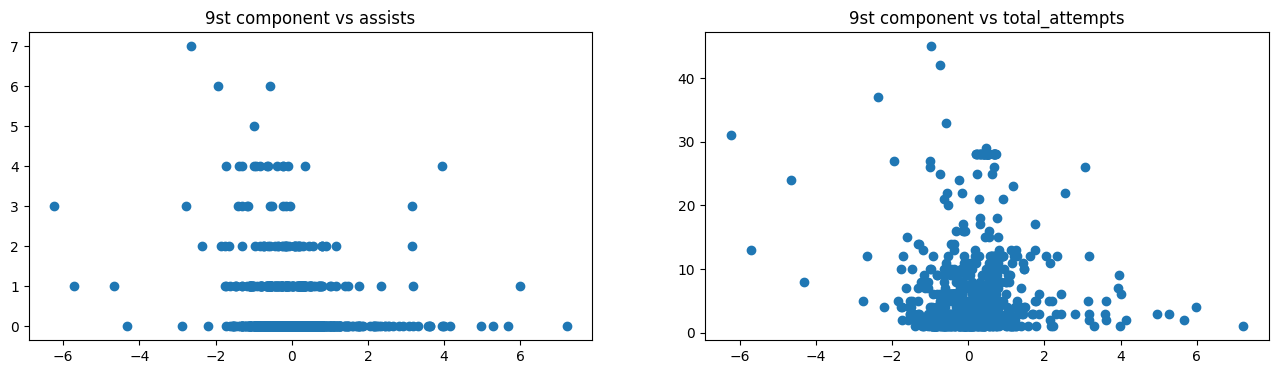

In [71]:
for num in range(0,10):
    _, axes = plt.subplots(ncols=2, figsize=(16,4))
    for i, (ax, col) in enumerate(zip(axes, ['assists', 'total_attempts'])):
        ax.scatter(X_proj[:,num], df[col])
        ax.set_title(f'{num}st component vs {col}')

# FA

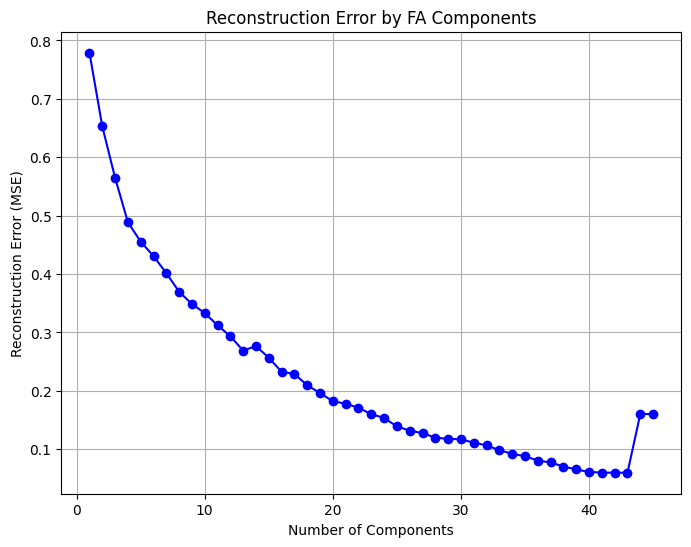

In [72]:
def reconstruction_error_by_fa_components(X, max_components=10):
    # Liste pour stocker les erreurs de reconstruction
    reconstruction_errors = []

    # Tester différents nombres de composants de 1 à max_components
    for n_components in range(1, max_components + 1):
        # Appliquer l'analyse factorielle avec n_components
        fa = FactorAnalysis(n_components=n_components)
        X_transformed = fa.fit_transform(X)

        # Reconstruire les données approximatives en utilisant les facteurs extraits
        X_reconstructed = np.dot(X_transformed, fa.components_) + fa.mean_

        # Calculer l'erreur de reconstruction (erreur quadratique moyenne)
        error = mean_squared_error(X, X_reconstructed)
        reconstruction_errors.append(error)

    # Tracer le graphe
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_components + 1), reconstruction_errors, marker='o', linestyle='-', color='b')
    plt.title('Reconstruction Error by FA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error (MSE)')
    plt.grid(True)
    plt.show()
    
reconstruction_error_by_fa_components(X_scaled, max_components=X_scaled.shape[1])

On retrouve des resultats moins bon qu'avec le PCA : pour 20 dimension, on a un peu plus de 80% de l'info

# Clustering

# K-Means

In [73]:
# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score


In [74]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(X_scaled) 
    cluster_labels = clusterer.labels_ 
    silhouette_avg = silhouette_score(X_scaled, cluster_labels) 
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.19547551448473355
For n = 3 Silhouette_score: 0.18819936332976592
For n = 4 Silhouette_score: 0.18619781204021207
For n = 5 Silhouette_score: 0.20259347859603624
For n = 6 Silhouette_score: 0.13727676055493718
For n = 7 Silhouette_score: 0.13974185587348034
For n = 8 Silhouette_score: 0.14593185568461883
For n = 9 Silhouette_score: 0.14492772674597057
For n = 10 Silhouette_score: 0.15272354944067812


# Hierarchical

In [75]:
# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [76]:
# We now perform hierarchical clustering. 

# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(X_scaled, 'ward') 
print(Z)

[[6.92000000e+02 9.91000000e+02 0.00000000e+00 2.00000000e+00]
 [2.64000000e+02 9.87000000e+02 0.00000000e+00 2.00000000e+00]
 [8.50000000e+01 7.96000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [1.99500000e+03 1.99800000e+03 7.99650420e+01 5.11000000e+02]
 [2.00000000e+03 2.00100000e+03 8.15447944e+01 4.92000000e+02]
 [2.00200000e+03 2.00300000e+03 1.04782324e+02 1.00300000e+03]]


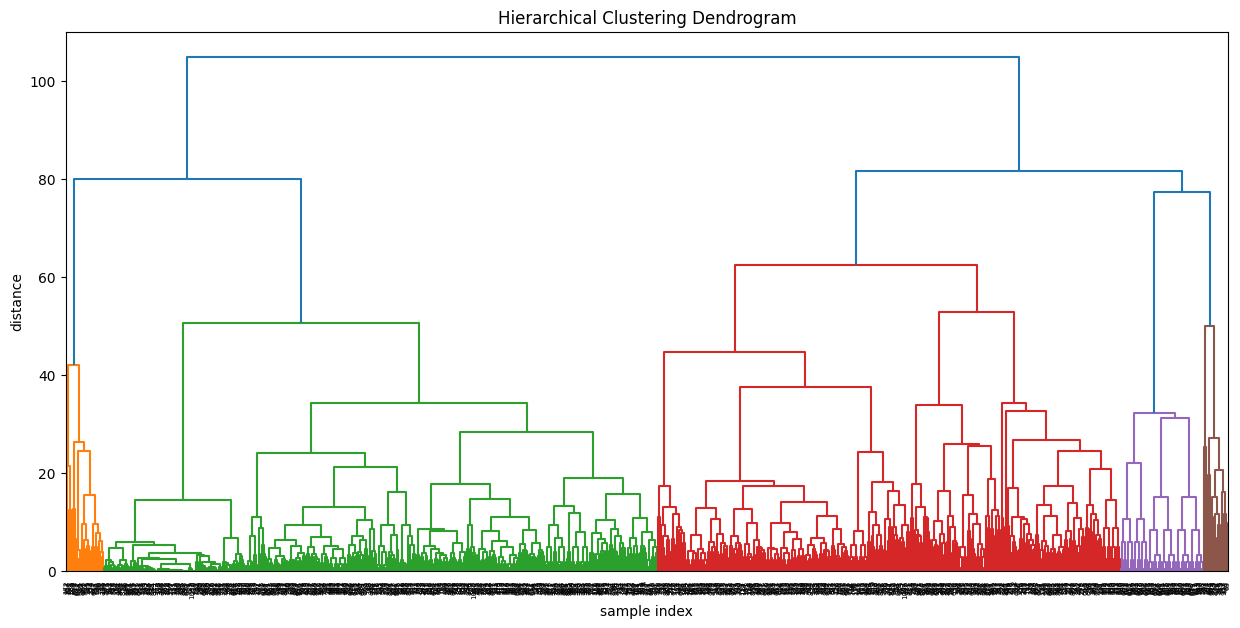

In [77]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(X_scaled, 'ward')
)
plt.xticks(rotation=90)
plt.show()

In [78]:
metrics=['euclidean','hamming', 'cityblock' , 'cosine'] # metrics used for linkage 
methods=['single','complete','average'] # methods used for linkage
pdists=['euclidean','minkowski','cityblock','cosine']  # metrics used for pdist()
max_val=0
best_metric=None
best_method=None
best_p_dist=None

for metric1 in metrics:
    for method1 in methods:
        for pdist1 in pdists:
            Z=linkage(X_scaled,method1,metric=metric1)
            c, coph_dists = cophenet(Z, pdist(X_scaled,pdist1))
            if (c>max_val):
                max_val=c
                best_metric=metric1
                best_method=method1
                best_p_dist=pdist1
            else:
                max_val=max_val
            print('(',method1,',',metric1,',',pdist1,') :',c)
print('the best cophenet index is about :',max_val,'which corresponds to the triple: (metric=',best_metric,',method=',best_method,'and pdist=',best_p_dist,')')

( single , euclidean , euclidean ) : 0.8873672622554981
( single , euclidean , minkowski ) : 0.8873672622554981
( single , euclidean , cityblock ) : 0.8367911523900383
( single , euclidean , cosine ) : 0.2990052959216321
( complete , euclidean , euclidean ) : 0.7477660505018578
( complete , euclidean , minkowski ) : 0.7477660505018578
( complete , euclidean , cityblock ) : 0.7087831847041919
( complete , euclidean , cosine ) : 0.5163311071043087
( average , euclidean , euclidean ) : 0.9204545216277855
( average , euclidean , minkowski ) : 0.9204545216277855
( average , euclidean , cityblock ) : 0.8612996270290034
( average , euclidean , cosine ) : 0.3500568445040405
( single , hamming , euclidean ) : 0.5853401297235292
( single , hamming , minkowski ) : 0.5853401297235292
( single , hamming , cityblock ) : 0.7047059811178263
( single , hamming , cosine ) : 0.47364838264524683
( complete , hamming , euclidean ) : 0.3189432657443102
( complete , hamming , minkowski ) : 0.3189432657443102

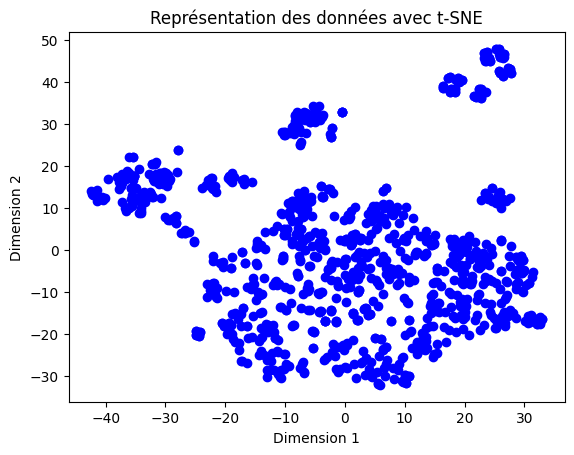

In [79]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne= TSNE(n_components=2, learning_rate='auto',
                  init='random')
X_tsne=tsne.fit_transform(X_scaled)

#print(X_scaled.shape,X_tsne.shape)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', marker='o')

plt.title('Représentation des données avec t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()



In [80]:
from sklearn.manifold import trustworthiness

for i in range(1, 4):
    tsnex = TSNE(n_components=i, learning_rate='auto', init='random')
    X_tsnex = tsnex.fit_transform(X_scaled)
    
    trust = trustworthiness(X_scaled, X_tsnex, n_neighbors=5)
    
    print(f"Trustworthiness score for {i} dimensions: {trust:.2f}")


Trustworthiness score for 1 dimensions: 0.95
Trustworthiness score for 2 dimensions: 0.98
Trustworthiness score for 3 dimensions: 0.99


In [81]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = KMeans(n_clusters=n, n_init=10).fit(X_tsne) # Clustering with the given number of clusters
    cluster_labels = clusterer.labels_ # Extract the labels
    silhouette_avg = silhouette_score(X_tsne, cluster_labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.3879602
For n = 3 Silhouette_score: 0.40622205
For n = 4 Silhouette_score: 0.42616376
For n = 5 Silhouette_score: 0.4674356
For n = 6 Silhouette_score: 0.48379087
For n = 7 Silhouette_score: 0.4860506
For n = 8 Silhouette_score: 0.4612366
For n = 9 Silhouette_score: 0.4724322
For n = 10 Silhouette_score: 0.46453777


[[ -1.3469274   3.7590997]
 [ -6.045985   30.063812 ]
 [ 22.365667   -5.497826 ]
 [-14.30253   -15.671834 ]
 [ 22.484947   41.8536   ]
 [-31.027843   14.401073 ]
 [  5.429926  -21.433323 ]]


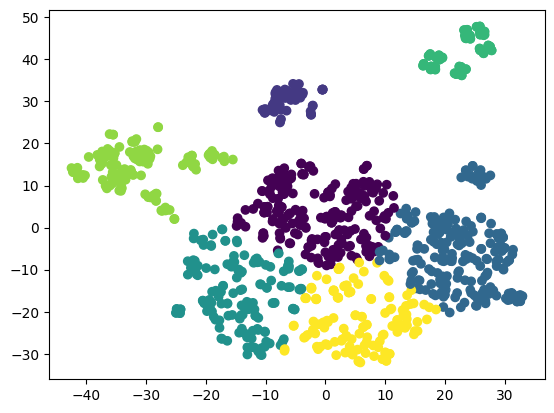

In [84]:
# We run a K-means algorithm onto the dataset, and display the centers
kmeans = KMeans(n_clusters=7,n_init=40,init='random').fit(X_tsne)
centers=kmeans.cluster_centers_
print(centers)

# We also represent the data in 2D-space with colors corresponding to cluster
kmeans.labels_
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=kmeans.labels_)

In [89]:
from sklearn.mixture import GaussianMixture


# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
    clusterer = GaussianMixture(n_components=n).fit(X_scaled) # Clustering with the given number of clusters
    labels=clusterer.predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels) # Corresponding silhouette score
   
    # Display the results
    print("For n =", n, "Silhouette_score:", silhouette_avg)


For n = 2 Silhouette_score: 0.20277699660684792
For n = 3 Silhouette_score: 0.0922654771163326
For n = 4 Silhouette_score: 0.15733886318647572
For n = 5 Silhouette_score: 0.20984893363266519
For n = 6 Silhouette_score: 0.09555541554285504
For n = 7 Silhouette_score: 0.07525744815231468
For n = 8 Silhouette_score: 0.12775205325200326
For n = 9 Silhouette_score: 0.13024692297832569
For n = 10 Silhouette_score: 0.1311477120672516
